In [1]:
words = open('names.txt' , 'r').read().splitlines()

In [2]:
len(words)

32033

In [3]:
b = {}
for w in words:
    chs = ['.'] + list(w)+ ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram , 0)+1

In [4]:
b

{('.', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '.'): 6640,
 ('.', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('.', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('.', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('.', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('.', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '.'): 3983,
 ('.', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('.', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '.'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '.'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,
 ('g', 'a'): 330,
 ('a',

In [5]:
import torch

In [6]:
N  = torch.zeros((27,27) , dtype=torch.int32)

In [7]:
chars = sorted(list((set(''.join(words)))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [8]:
for w in words:
    chs = ['.'] + list(w)+ ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2]+=1

In [9]:
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

(-0.5, 26.5, 26.5, -0.5)

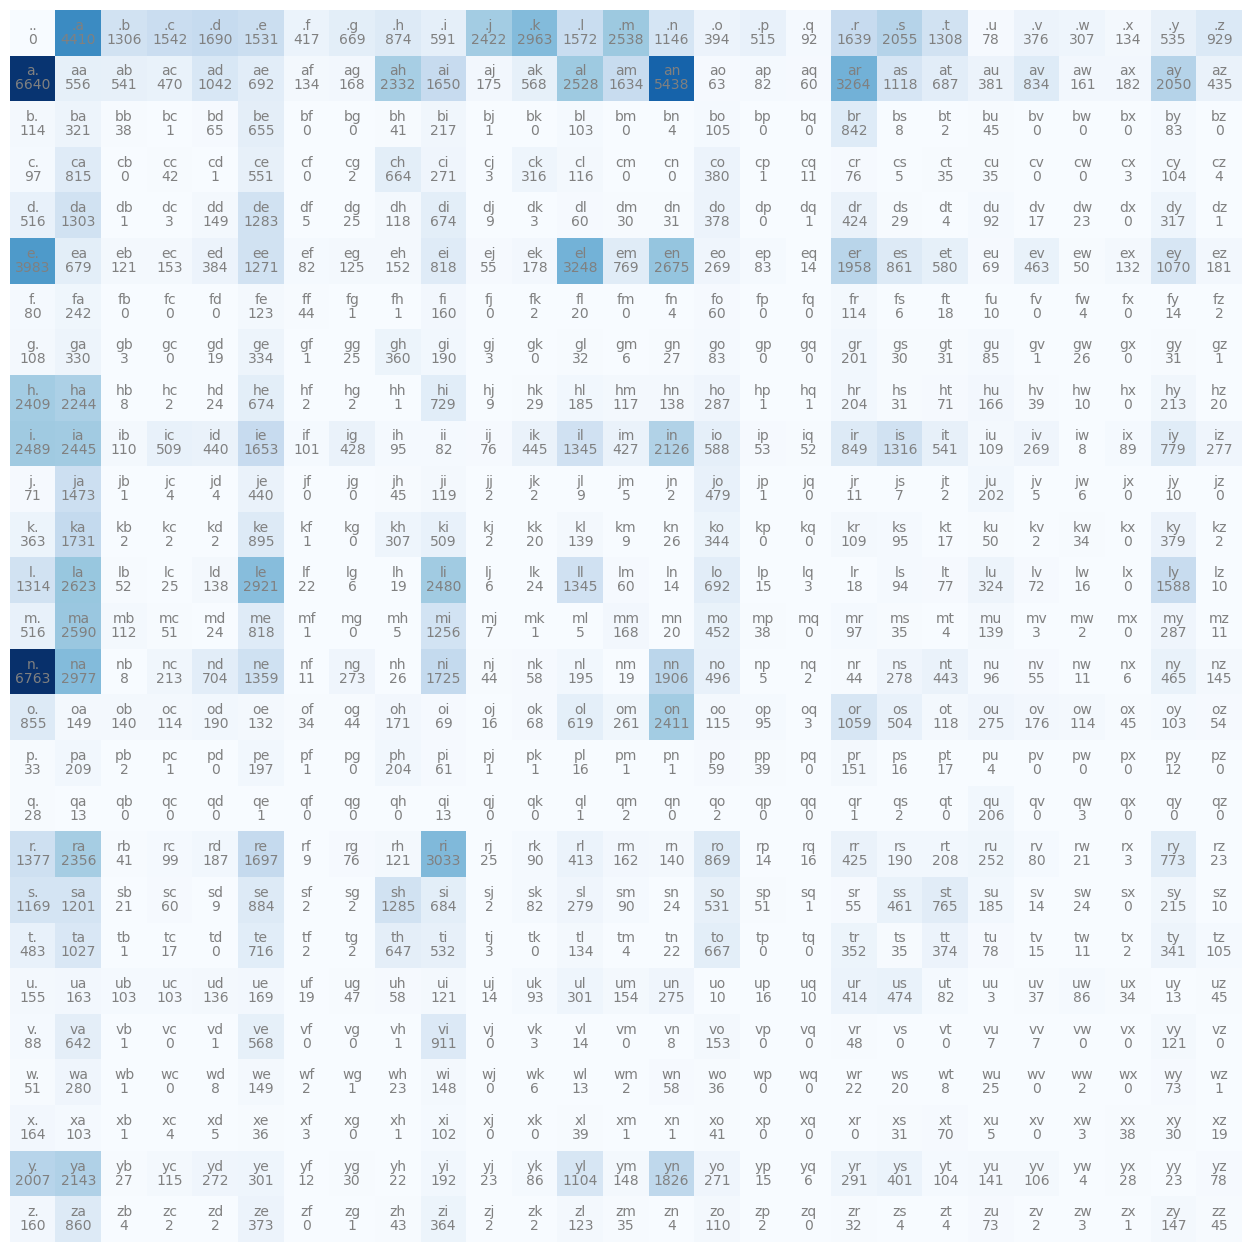

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.imshow(N) 

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i]+itos[j]
        plt.text(j, i , chstr, ha="center" , va="bottom" , color='gray')
        plt.text(j, i , N[i , j].item(), ha="center" , va="top" , color='gray')
plt.axis('off')        

In [11]:
N[0, :].float()


tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])

In [12]:
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [13]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement = True, generator=g).item()
itos[ix]

'j'

In [14]:
# g = torch.Generator().manual_seed(2147483647)
# p = torch.rand(3, generator=g)
# p = p/p.sum()
# p

In [15]:
# torch.multinomial(p, num_samples=20, replacement=True, generator=g)

In [16]:
P = (N+1).float()
P = P/P.sum(1,keepdims=True)

In [17]:
P.sum(0, keepdim=True)

tensor([[3.0023, 5.3111, 0.1847, 0.2300, 0.3840, 3.2304, 0.1100, 0.1341, 1.1715,
         2.7497, 0.1235, 0.3330, 1.1707, 0.4055, 1.2774, 1.3664, 0.1091, 0.0295,
         1.6097, 0.7284, 0.5734, 1.1475, 0.1643, 0.1291, 0.1069, 1.0258, 0.1921]])

In [80]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0
    while True:
        p=P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement = True, generator=g).item()
        out.append(itos[ix])
#     print(itos[ix])
        if ix == 0:
            break
    print(''.join(out))       

junide.
janasah.
p.
cony.
a.


In [19]:
log_likelihood = 0.0
n = 0
for w in ["andrejq"]:
    chs = ['.']+list(w)+['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f'{ch1}{ch2}: {prob:.4f} , {logprob}')       
print(log_likelihood)
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

.a: 0.1376 , -1.983507752418518
an: 0.1604 , -1.8301737308502197
nd: 0.0384 , -3.2594051361083984
dr: 0.0770 , -2.564587354660034
re: 0.1334 , -2.0142745971679688
ej: 0.0027 , -5.900386333465576
jq: 0.0003 , -7.981733322143555
q.: 0.0970 , -2.3331477642059326
tensor(-27.8672)
nll=tensor(27.8672)
3.4834020137786865


In [20]:
# Create the training set of bigrams
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w)+ ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [21]:
xs

tensor([ 0,  5, 13, 13,  1])

In [22]:
ys

tensor([ 5, 13, 13,  1,  0])

In [23]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

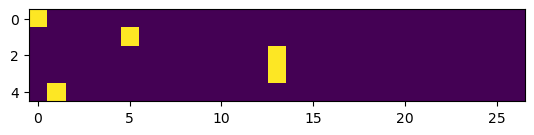

In [24]:
plt.imshow(xenc)

In [25]:
xenc.dtype

torch.float32

In [26]:
torch.float32

torch.float32

In [27]:
W = torch.randn((27,27))

In [28]:
W

tensor([[-6.2925e-01, -1.2799e+00, -1.2299e+00, -4.4181e-01,  2.2990e-02,
          1.7552e-01, -5.6292e-01, -5.5882e-01, -1.3771e-01, -4.7464e-01,
         -4.4689e-01, -1.1653e-01,  8.9468e-02, -1.0549e+00,  2.9120e-01,
          4.3779e-01, -1.1664e-01, -3.0498e-01,  4.4300e-01, -1.6527e+00,
          6.9284e-01,  1.0989e+00, -9.8152e-01,  2.3528e-01, -5.8526e-01,
         -9.0544e-01,  8.4695e-01],
        [-6.5952e-01, -1.0395e-02, -2.8880e-01,  1.3010e+00, -9.6458e-01,
          7.6280e-01,  1.7843e+00, -4.0381e-01,  4.7127e-01,  1.4911e-01,
         -7.8131e-01,  1.8095e+00, -1.0917e+00, -6.6492e-01, -3.0343e-01,
         -8.3156e-01, -2.9616e-01,  2.3197e-01,  1.1480e+00,  1.3891e-01,
          3.9480e-01,  3.2962e-01,  7.6014e-01, -1.3086e+00, -2.8178e+00,
         -1.5096e+00, -6.4994e-01],
        [ 2.1182e-01, -4.6279e-01,  8.0327e-02,  5.3417e-01,  8.1709e-01,
          1.6585e+00, -4.2836e-01,  2.6758e-01, -4.9600e-01,  1.0361e+00,
         -1.0599e+00, -2.3485e-01,  6.39

In [74]:
xenc[1]*W[1]

tensor([ 0.0000, -0.0000, -0.0000, -0.0000,  0.0000, -0.0213, -0.0000, -0.0000,
         0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000,  0.0000, -0.0000,
        -0.0000, -0.0000,  0.0000,  0.0000, -0.0000, -0.0000,  0.0000, -0.0000,
        -0.0000,  0.0000, -0.0000], grad_fn=<MulBackward0>)

In [73]:
xenc@W

tensor([[-3.1872,  2.1474,  0.9300,  ..., -1.3530,  0.0365,  0.5891],
        [ 2.7876,  1.0178, -0.7109,  ..., -0.6251,  1.4729, -0.3069],
        [ 2.3580,  3.9828,  0.7532,  ..., -1.2024,  1.7585, -1.2807],
        ...,
        [ 3.1305,  3.1962, -1.1213,  ..., -1.0543, -1.0666, -0.1853],
        [ 1.9269,  3.6656, -1.1142,  ..., -0.4671,  1.8260,  0.5456],
        [ 2.4045,  1.7796, -0.7154,  ...,  0.5348,  0.0381,  0.3902]],
       grad_fn=<MmBackward0>)

In [30]:
(xenc @ W).exp()

tensor([[ 0.5330,  0.2781,  0.2923,  0.6429,  1.0233,  1.1919,  0.5695,  0.5719,
          0.8714,  0.6221,  0.6396,  0.8900,  1.0936,  0.3482,  1.3380,  1.5493,
          0.8899,  0.7371,  1.5574,  0.1915,  1.9994,  3.0010,  0.3747,  1.2653,
          0.5570,  0.4044,  2.3325],
        [ 4.6816,  0.8303,  1.7188,  2.2240,  0.7948,  4.3311,  0.0624,  1.0158,
          2.9484,  2.4398,  1.2666,  1.1475,  0.2244,  1.4685,  2.0108,  1.9760,
          0.2880,  0.4033,  0.7628,  0.3262,  0.8027,  4.7943,  1.3923,  1.2877,
          0.3196, 10.8932,  0.6442],
        [ 1.9171,  0.9307,  0.5663,  0.2914,  0.1896,  1.1165,  0.8124,  0.1288,
          0.5617,  0.3559,  0.8225,  2.9096,  0.9066,  0.7564,  1.9205,  2.0128,
          1.0532,  0.6332,  4.0032,  0.7431,  0.6996,  4.4087,  0.7268,  0.6510,
          0.7365,  0.7085,  0.3817],
        [ 1.9171,  0.9307,  0.5663,  0.2914,  0.1896,  1.1165,  0.8124,  0.1288,
          0.5617,  0.3559,  0.8225,  2.9096,  0.9066,  0.7564,  1.9205,  2.0128

In [31]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts/counts.sum(1, keepdims=True)
probs

tensor([[0.0207, 0.0108, 0.0113, 0.0250, 0.0397, 0.0463, 0.0221, 0.0222, 0.0338,
         0.0241, 0.0248, 0.0345, 0.0424, 0.0135, 0.0519, 0.0601, 0.0345, 0.0286,
         0.0604, 0.0074, 0.0776, 0.1165, 0.0145, 0.0491, 0.0216, 0.0157, 0.0905],
        [0.0917, 0.0163, 0.0337, 0.0436, 0.0156, 0.0848, 0.0012, 0.0199, 0.0577,
         0.0478, 0.0248, 0.0225, 0.0044, 0.0288, 0.0394, 0.0387, 0.0056, 0.0079,
         0.0149, 0.0064, 0.0157, 0.0939, 0.0273, 0.0252, 0.0063, 0.2134, 0.0126],
        [0.0620, 0.0301, 0.0183, 0.0094, 0.0061, 0.0361, 0.0263, 0.0042, 0.0182,
         0.0115, 0.0266, 0.0940, 0.0293, 0.0244, 0.0621, 0.0650, 0.0340, 0.0205,
         0.1294, 0.0240, 0.0226, 0.1425, 0.0235, 0.0210, 0.0238, 0.0229, 0.0123],
        [0.0620, 0.0301, 0.0183, 0.0094, 0.0061, 0.0361, 0.0263, 0.0042, 0.0182,
         0.0115, 0.0266, 0.0940, 0.0293, 0.0244, 0.0621, 0.0650, 0.0340, 0.0205,
         0.1294, 0.0240, 0.0226, 0.1425, 0.0235, 0.0210, 0.0238, 0.0229, 0.0123],
        [0.0133, 0.0255,

In [32]:
xs

tensor([ 0,  5, 13, 13,  1])

In [33]:
ys

tensor([ 5, 13, 13,  1,  0])

In [34]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g)

In [35]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W #predict log-counts
counts = logits.exp() #counts equivalent to N
probs = counts/counts.sum(1, keepdim=True)
loss = -probs[torch.arange(5),ys].log().mean()

In [36]:
probs.shape

torch.Size([5, 27])

In [37]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('-------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilitiess from neural net:',probs[i])
    print('label (actual next character):' , y)
    p = probs[i,y]
    print('probability assigned by the net to the correct character:',p.item())
    logp = torch.log(p)
    print('log likelihood' , logp.item())
    nll = -logp
    print('negative log likelihood: ' , nll.item())
    nlls[i] = nll
    print('========')
    print('average negative log likelihood, i.e loss=', nlls.mean().item())

-------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilitiess from neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the correct character: 0.01228625513613224
log likelihood -4.399273872375488
negative log likelihood:  4.399273872375488
average negative log likelihood, i.e loss= 0.8798547983169556
-------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilitiess from neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability as

In [38]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), requires_grad=True, generator=g) 

In [56]:
xenc = F.one_hot(xs, num_classes=27).float()
print(xenc[0])
logits = xenc @ W #predict log-counts
counts = logits.exp() #counts equivalent to N
probs = counts/counts.sum(1, keepdim=True)
# loss = -probs[torch.arange(5),ys].log().mean()

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [40]:
print(loss.item())

3.7693049907684326


In [41]:
# backward pass
W.grad = None
loss.backward()

In [42]:
W.data+= -0.1*W.grad

In [47]:
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w)+ ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of example:' , num)
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), requires_grad=True, generator=g) 

number of example: 228146


In [75]:
for k in range(100):
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W #predict log-counts
    counts = logits.exp() #counts equivalent to N
    probs = counts/counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(num),ys].log().mean()+0.01*(W**2).mean()
    print(loss.item())
    
    #backward pass
    W.grad = None
    loss.backward()
    #update 
    W.data+= -50*W.grad

2.4834225177764893
2.4833827018737793
2.4833457469940186
2.4833104610443115
2.483276605606079
2.4832448959350586
2.4832139015197754
2.4831838607788086
2.4831552505493164
2.4831271171569824
2.483100175857544
2.4830739498138428
2.4830482006073
2.483022928237915
2.482998847961426
2.4829747676849365
2.4829516410827637
2.48292875289917
2.4829068183898926
2.4828848838806152
2.482863426208496
2.482842206954956
2.4828221797943115
2.482801675796509
2.4827818870544434
2.4827628135681152
2.482743263244629
2.482724905014038
2.482706308364868
2.4826881885528564
2.482670307159424
2.4826526641845703
2.482635498046875
2.4826183319091797
2.4826016426086426
2.4825849533081055
2.4825687408447266
2.4825525283813477
2.482536554336548
2.4825210571289062
2.4825055599212646
2.482490301132202
2.482475757598877
2.4824604988098145
2.48244571685791
2.482431411743164
2.482417106628418
2.482403039932251
2.482388973236084
2.482375383377075
2.4823617935180664
2.4823484420776367
2.482335329055786
2.4823219776153564
2.

In [79]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0
    while True:
        # BEFORE
        p=P[ix]
        
        #Now
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W #predict log-counts
        counts = logits.exp() #counts equivalent to N
        p = counts/counts.sum(1, keepdim=True)
        ix = torch.multinomial(p, num_samples=1, replacement = True, generator=g).item()
        out.append(itos[ix])
#     print(itos[ix])
        if ix == 0:
            break
    print(''.join(out))       

junide.
janasah.
prelay.
a.
nn.


In [ ]:
junide.
janasah.
p.
cony.
a.